# INMERSIÓN DE DATOS CON PYTHON

# **DESAFÍOS**



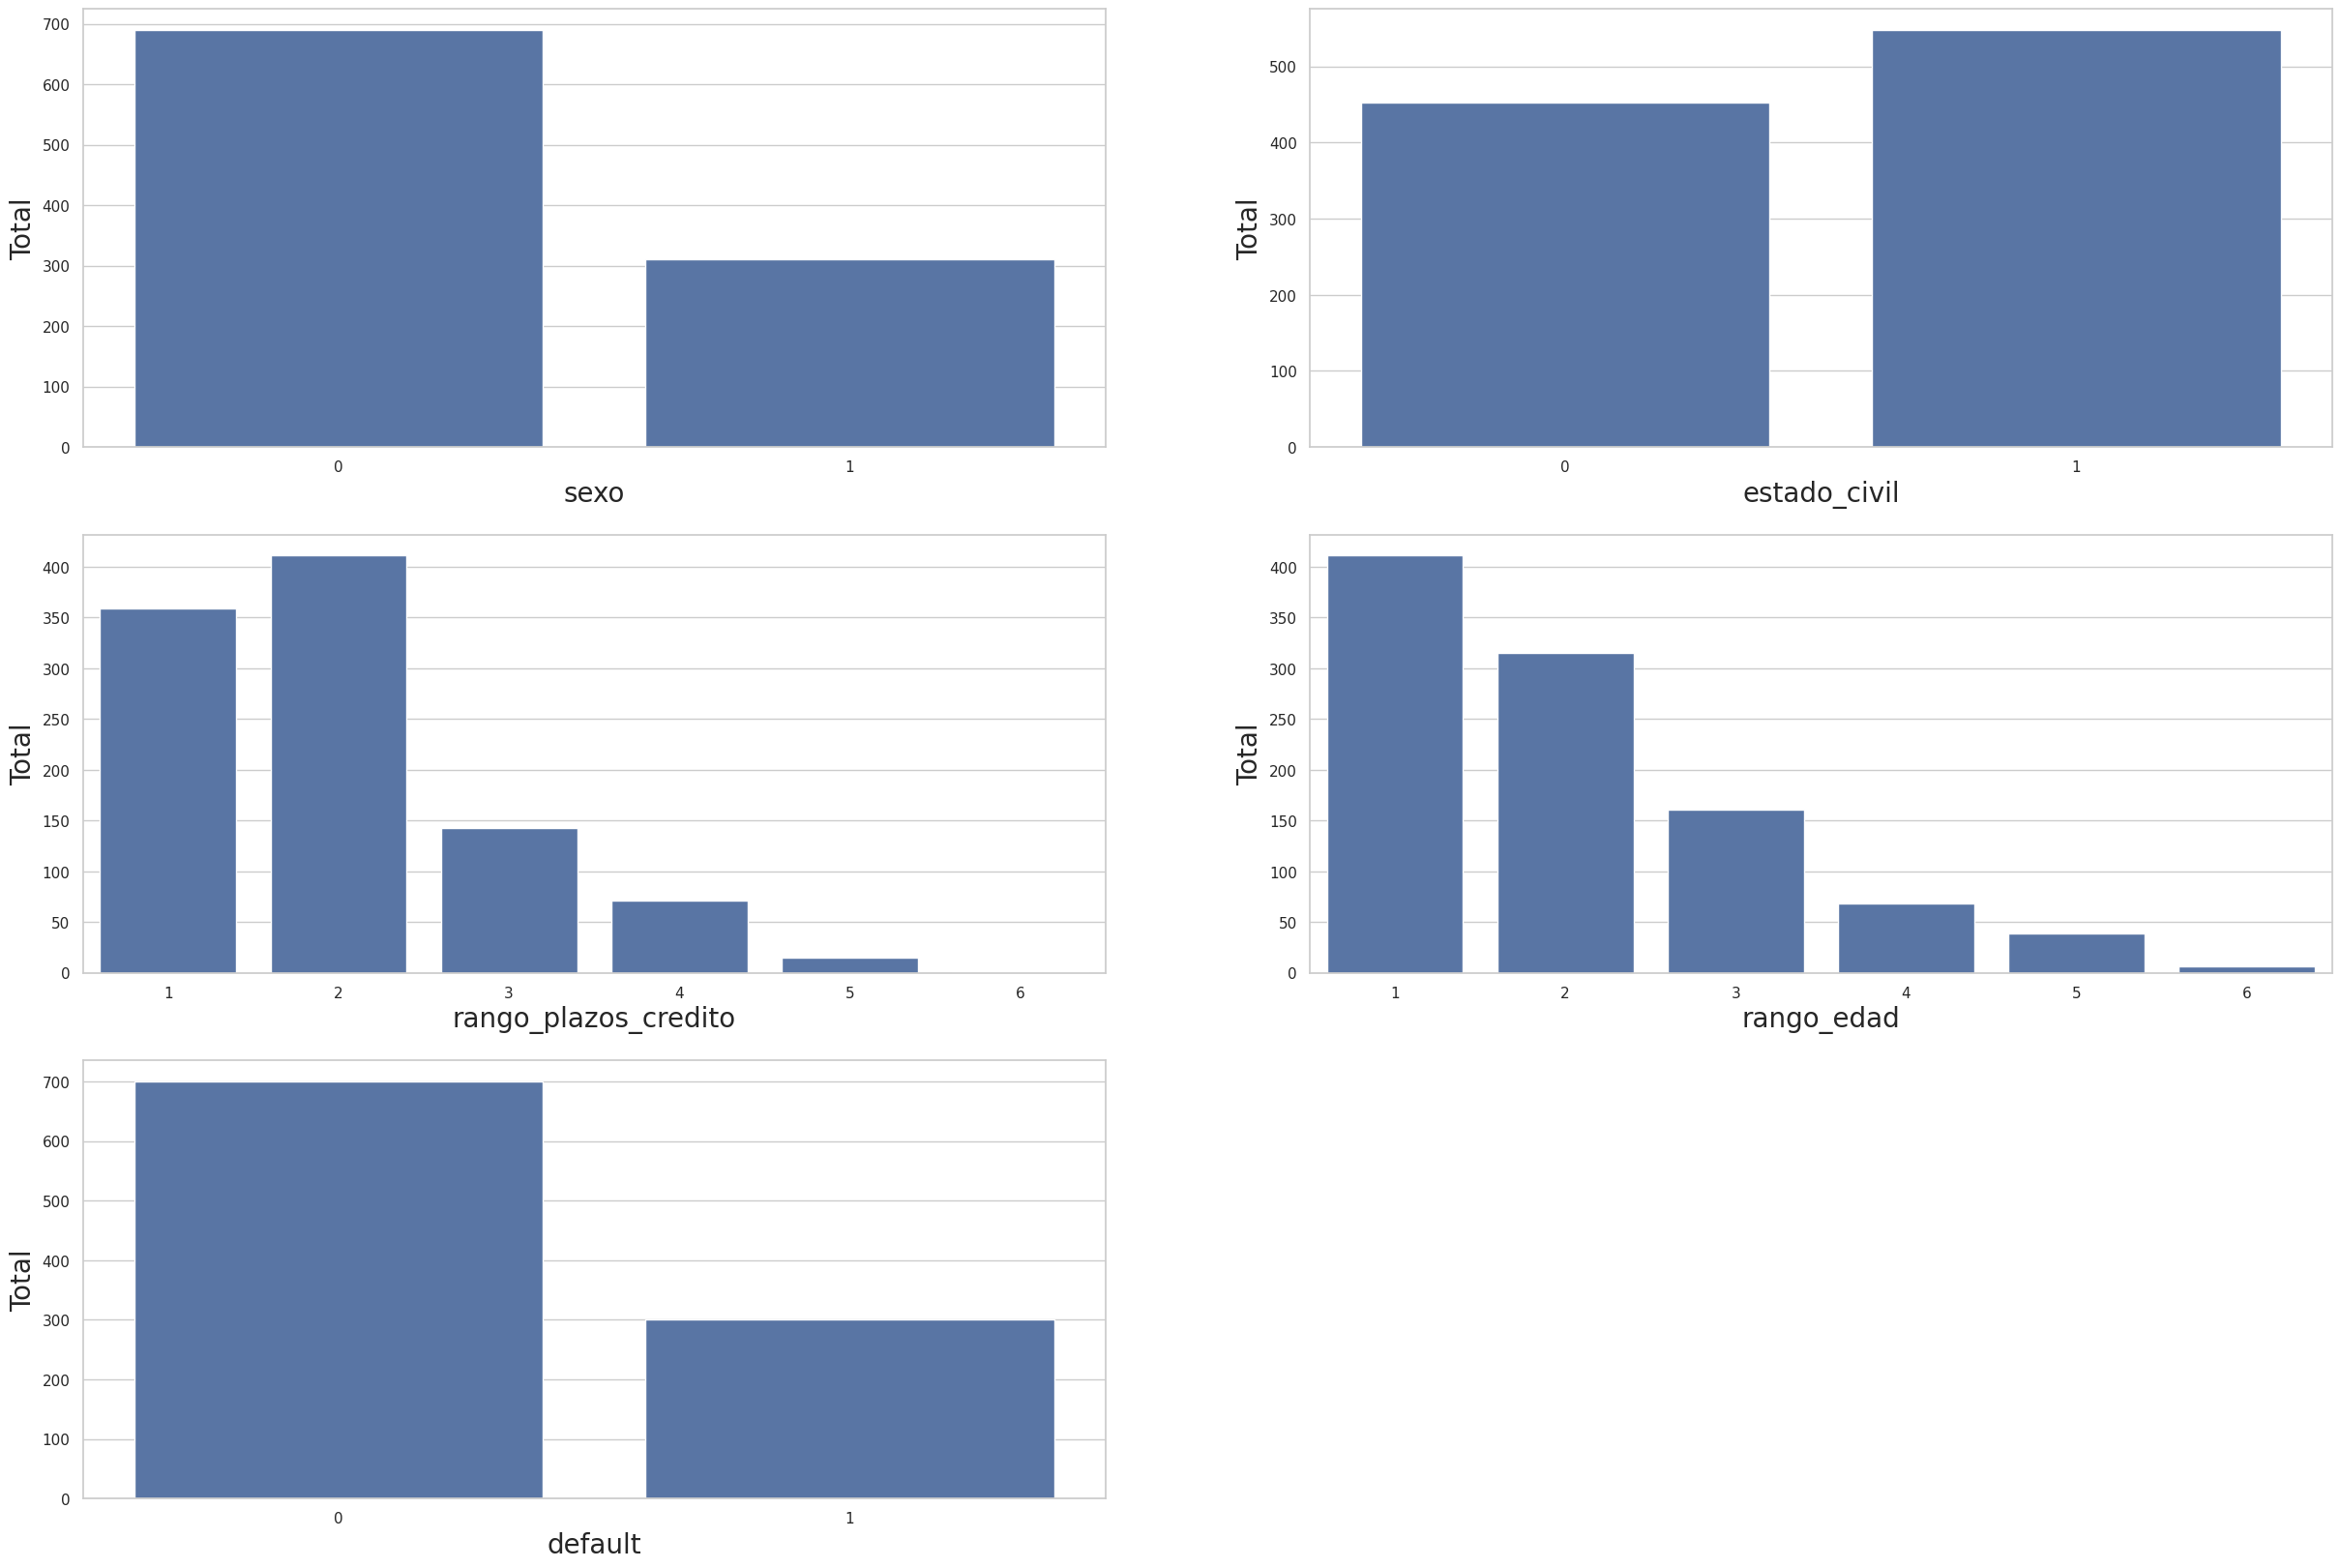

In [ ]:
analisis_exploratorio()

## **1. Analizar los datos de las distribuciones e identificar si hay algún valor o registros que no se deben considerar para el modelo.**

**Clientes de 70 a 80 años:** Aunque representen solo el 0.6% del total, este grupo puede tener características únicas que los diferencian de otros grupos de edad. Es importante asegurarse que el conjunto de datos incluya suficientes ejemplos de esta edad para que el modelo pueda aprender patrones relevantes para este grupo. Además, se debe considerar si hay características específicas de este grupo (por ejemplo, necesidades financieras, comportamiento de gasto, etc.) que puedan influir en el resultado del modelo.

**Cliente con plazo de crédito entre 5 y 6 años:** Aunque este cliente sea único en su categoría, aún es importante considerarlo en el modelo. Puede ser un caso atípico, pero la información que proporciona sobre cómo se comporta este cliente puede ser valiosa para comprender la variabilidad en el conjunto de datos y para asegurarse de que el modelo sea robusto y generalizable. Es posible que se desee considerar técnicas de ponderación para asegurarse de que este caso tenga un impacto proporcional en el entrenamiento del modelo.

## **2. Investigar qué es y como crear un mapa de calor para analizar la correlación de las variables.**

Un mapa de calor es una representación gráfica de datos tabulares(datos que están organizados en forma de una tabla) donde los valores se representan como colores. En el contexto de la correlación entre variables, un mapa de calor se utiliza para visualizar la fuerza y la dirección de la relación entre diferentes variables.

En un mapa de calor de correlación, cada celda de la matriz representa el grado de correlación entre dos variables. Los valores de correlación más altos se muestran con colores más intensos (por ejemplo, rojo para una correlación positiva fuerte y azul para una correlación negativa fuerte), mientras que los valores de correlación más bajos se muestran con colores más suaves (por ejemplo, blanco o gris).

Los mapas de calor de correlación son útiles para identificar patrones y relaciones entre las variables en un conjunto de datos. Pueden ayudar a los analistas a comprender qué variables están más estrechamente relacionadas entre sí y cómo cambian juntas. Esto puede ser útil en campos como la investigación científica, el análisis de datos comerciales y la toma de decisiones en áreas como la salud y las finanzas.







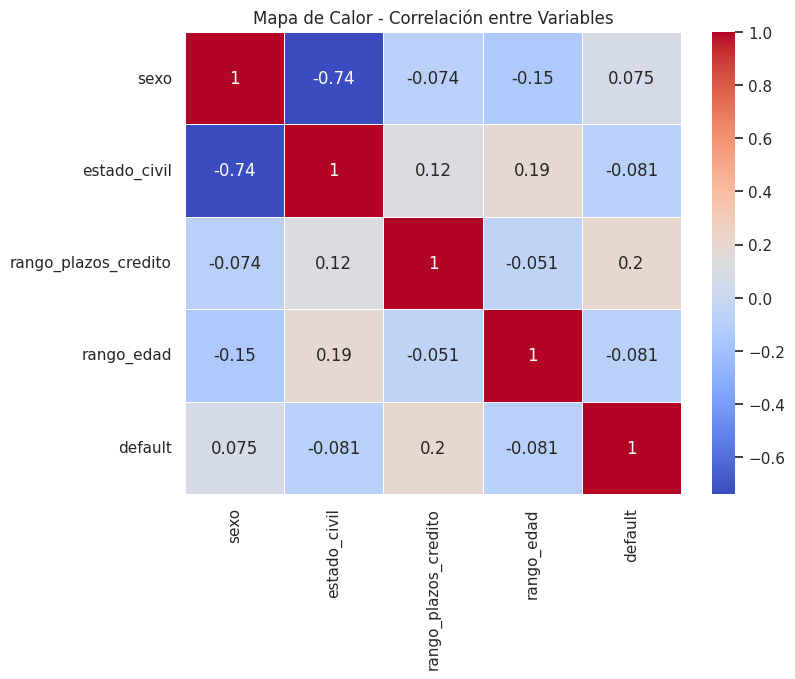

In [ ]:
# Seleccionar solo las columnas de interés
df_subset = df_banco[['sexo', 'estado_civil', 'rango_plazos_credito', 'rango_edad', 'default']]

# Calcular la matriz de correlación
correlation_matrix = df_subset.corr()

# Crear el mapa de calor con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor - Correlación entre Variables')
plt.show()

## **3. Crear una conclusión para cada uno de los gráficos del histograma. Mirar los datos y extraer conclusiones, porque es una habilidad esencial..**

###**Para el histograma 'sexo'**, la mayor cantidad de clientes son hombres, a continuación se muestran los porcentajes

In [ ]:
total_observaciones = df_banco['sexo'].count()

# Contar el número de hombres (0) y mujeres (1)
conteo_sexos = df_banco['sexo'].value_counts()

# Calcular el porcentaje de cada sexo con respecto al total
porcentaje_hombres = (conteo_sexos[0] / total_observaciones) * 100
porcentaje_mujeres = (conteo_sexos[1] / total_observaciones) * 100

print("Porcentaje de hombres:", porcentaje_hombres,'%')
print("Porcentaje de mujeres:", porcentaje_mujeres,'%')

Porcentaje de hombres: 69.0 %
Porcentaje de mujeres: 31.0 %


###**Para el histograma 'estado_civil'**, la mayor cantidad de clientes no son solteros a continuación se muestran los porcentajes

In [ ]:
# Obtenido de la función "feature_engineering" single = 1 y otros = 1
total_observaciones = df_banco['estado_civil'].count()

conteo_estadoCivil = df_banco['estado_civil'].value_counts()

porcentaje_solteros = (conteo_estadoCivil[0] / total_observaciones) * 100
porcentaje_otros = (conteo_estadoCivil[1] / total_observaciones) * 100

print("Porcentaje de solteros:", porcentaje_solteros,'%')
print("Porcentaje de otros:", porcentaje_otros,'%')

Porcentaje de solteros: 45.2 %
Porcentaje de otros: 54.800000000000004 %


###**Para el histograma 'rango_plazos_credito'**: estos son los rangos con sus respectivos números:

    1: '01-12 meses'
    2: '12-24 meses'
    3: '24-36 meses'
    4: '36-48 meses'
    5: '48-60 meses'
    6: '60-72 meses'

Se puede destacar que los plazos más utilizados son entre 1 y 2 años y el plazo entre 5 y 6 años corresponde a solo un cliente, como se ve en el siguiente código:

In [ ]:
# Obtener todas las filas donde 'rango_plazos_credito' tenga el número 6
cinco_seis_anos = df_banco[df_banco['rango_plazos_credito'] == 6]

# Calcular el total de filas
total_filas = len(cinco_seis_anos)

# Mostrar el total
print("Total de filas con 'rango_plazos_credito' igual a 6 es:", total_filas)

Total de filas con 'rango_plazos_credito' igual a 6 es: 1


###**Para el histograma 'rango_edad'**: La mayor concentración de clientes se encuentra en el sector joven y adulto joven, entre los 18 y 40 años

    1: '18-30 años'
    2: '30-40 años'
    3: '40-50 años'
    4: '50-60 años'
    5: '60-70 años'
    6: '70-80 años'

En el siguiente código se muestra el porcentaje de personas entre los 18 y 40 años con respecto a las demás edades.


In [ ]:
# Calcular el total de observaciones en la columna 'edad'
observaciones_total = df_banco['rango_edad'].count()

# Contar el número de observaciones para cada categoría
conteo_categorias = df_banco['rango_edad'].value_counts()

# Sumar las observaciones para las categorías 1 y 2, y para las categorías 3, 4, 5 y 6
suma_1_2 = conteo_categorias.loc[[1, 2]].sum()
suma_3_6 = conteo_categorias.loc[[3, 4, 5, 6]].sum()

# Calcular el porcentaje de cada suma con respecto al total
porcentaje_1_2 = (suma_1_2 / observaciones_total) * 100
porcentaje_3_6 = (suma_3_6 / observaciones_total) * 100

print("Porcentaje de categorías 1 y 2 es:", porcentaje_1_2,'%')
print("Porcentaje de categorías 3, 4, 5 y 6 es:", porcentaje_3_6,'%')

Porcentaje de categorías 1 y 2 es: 72.6 %
Porcentaje de categorías 3, 4, 5 y 6 es: 27.400000000000002 %


Para el rango de edad entre 70 y 80 años se observa que son los menos presentes en el histograma, su porcentaje con respecto al total se detalla a continuación:

In [ ]:
total_data = df_banco['rango_edad'].count()
total_grupo_6 = (df_banco['rango_edad'] == 6).sum()
porcentaje_grupo_6 = (total_grupo_6/total_data) * 100
porcentaje_grupo_6

print("Porcentaje de clientes entre 70 y 80 años es:", porcentaje_grupo_6,'%')

Porcentaje de clientes entre 70 y 80 años es: 0.6 %


###**Para el histograma 'deafult'**: El mayor porcentaje lo concentra los buenos clientes, acontinuación el detalle:

In [ ]:
total_ = df_banco['default'].count()


conteo_default = df_banco['default'].value_counts()

porcentaje_buen_cliente = (conteo_default[0] / total_) * 100
porcentaje_mal_cliente = (conteo_default[1] / total_) * 100

print("Porcentaje de buen cliente:", porcentaje_buen_cliente,'%')
print("Porcentaje de mal cliente:", porcentaje_mal_cliente,'%')

Porcentaje de buen cliente: 70.0 %
Porcentaje de mal cliente: 30.0 %


In [ ]:
# Guardar archivo
df_banco.to_csv('nombre_archivo.csv', index=False)